# Visualization (UMAP)

In [1]:
import pandas as pd
import pygsheets

gc = pygsheets.authorize(service_file="API/gSheet.json")
url = "https://docs.google.com/spreadsheets/d/16xf0r0qA2UJGa348M8KzfGRdYBtcg1LykduW_WrC0RE/edit#gid=1899414583"

import matplotlib.pyplot as plt
from tqdm import tqdm

import umap.plot as u_plot
import umap.umap_ as umap

u_plot.output_notebook()
tqdm.pandas()

Loading BokehJS ...

In [2]:
import numpy as np

In [3]:
df = pd.read_pickle("Datasets/pickle/embeddings_cleaned.pkl")

In [4]:
df.head(4)

,_id,subject_content_text_cleaned,minilm_embeddings_cleaned
93485,PMOPG/D/2023/0015581,pgrj,"[-0.09041333943605423, 0.013560930266976357, -..."
149941,PMOPG/D/2023/0023231,pgrj,"[-0.09041333943605423, 0.013560930266976357, -..."
137640,DEAID/E/2023/0005953,ट्रांसफर में व्याप्त भ्रष्टाचार छुपाने हेतु से...,"[0.06316458433866501, 0.014884322881698608, -0..."
26768,DOEXP/E/2023/0000087,expenditure pay upgradation anomalies in pay...,"[-0.06277257204055786, -0.006890749093145132, ..."


# Get Data from G sheets

In [5]:
sh = gc.open_by_url(url)

In [6]:
df_1 = sh.worksheet_by_title("Res_18k").get_as_df()
df_2 = sh.worksheet_by_title("Res_15k_part_2").get_as_df()

In [7]:
df_1["org"] = df_1["_id"].progress_apply(lambda r: r.split("/")[0])

100%|█████████████████████████████████| 18000/18000 [00:00<00:00, 946048.04it/s]


In [8]:
df_2["org"] = df_2["_id"].progress_apply(lambda r: r.split("/")[0])

100%|████████████████████████████████| 15750/15750 [00:00<00:00, 1407484.56it/s]


In [9]:
res_1 = pd.merge(df, df_1, on="_id", how="inner")
res_2 = pd.merge(df, df_2, on="_id", how="inner")

In [ ]:
res_1

In [10]:
embeddings_1 = np.array([np.array(em) for em in res_1.minilm_embeddings_cleaned])
embeddings_2 = np.array([np.array(em) for em in res_2.minilm_embeddings_cleaned])

In [11]:
embeddings_1.shape, embeddings_2.shape

((18000, 384), (15750, 384))

# For Part 1 (i.e., Res_18k)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


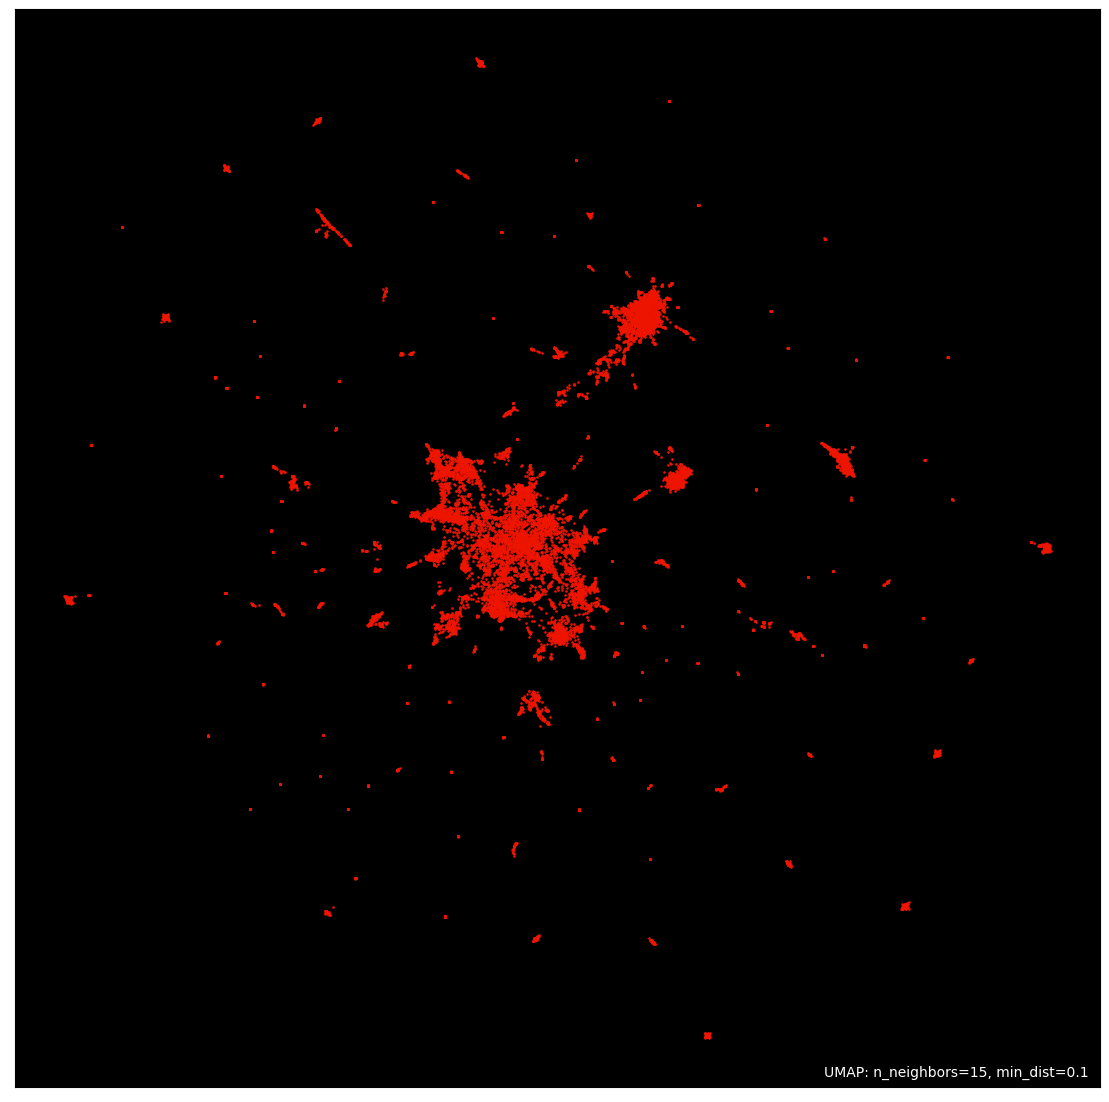

In [15]:
umap_obj = umap.UMAP().fit(embeddings_1)
f = u_plot.points(umap_obj, height=1400, width=1400, theme="fire")
plt.savefig("Image/Res_18k.png")
#u_plot.plt.show()

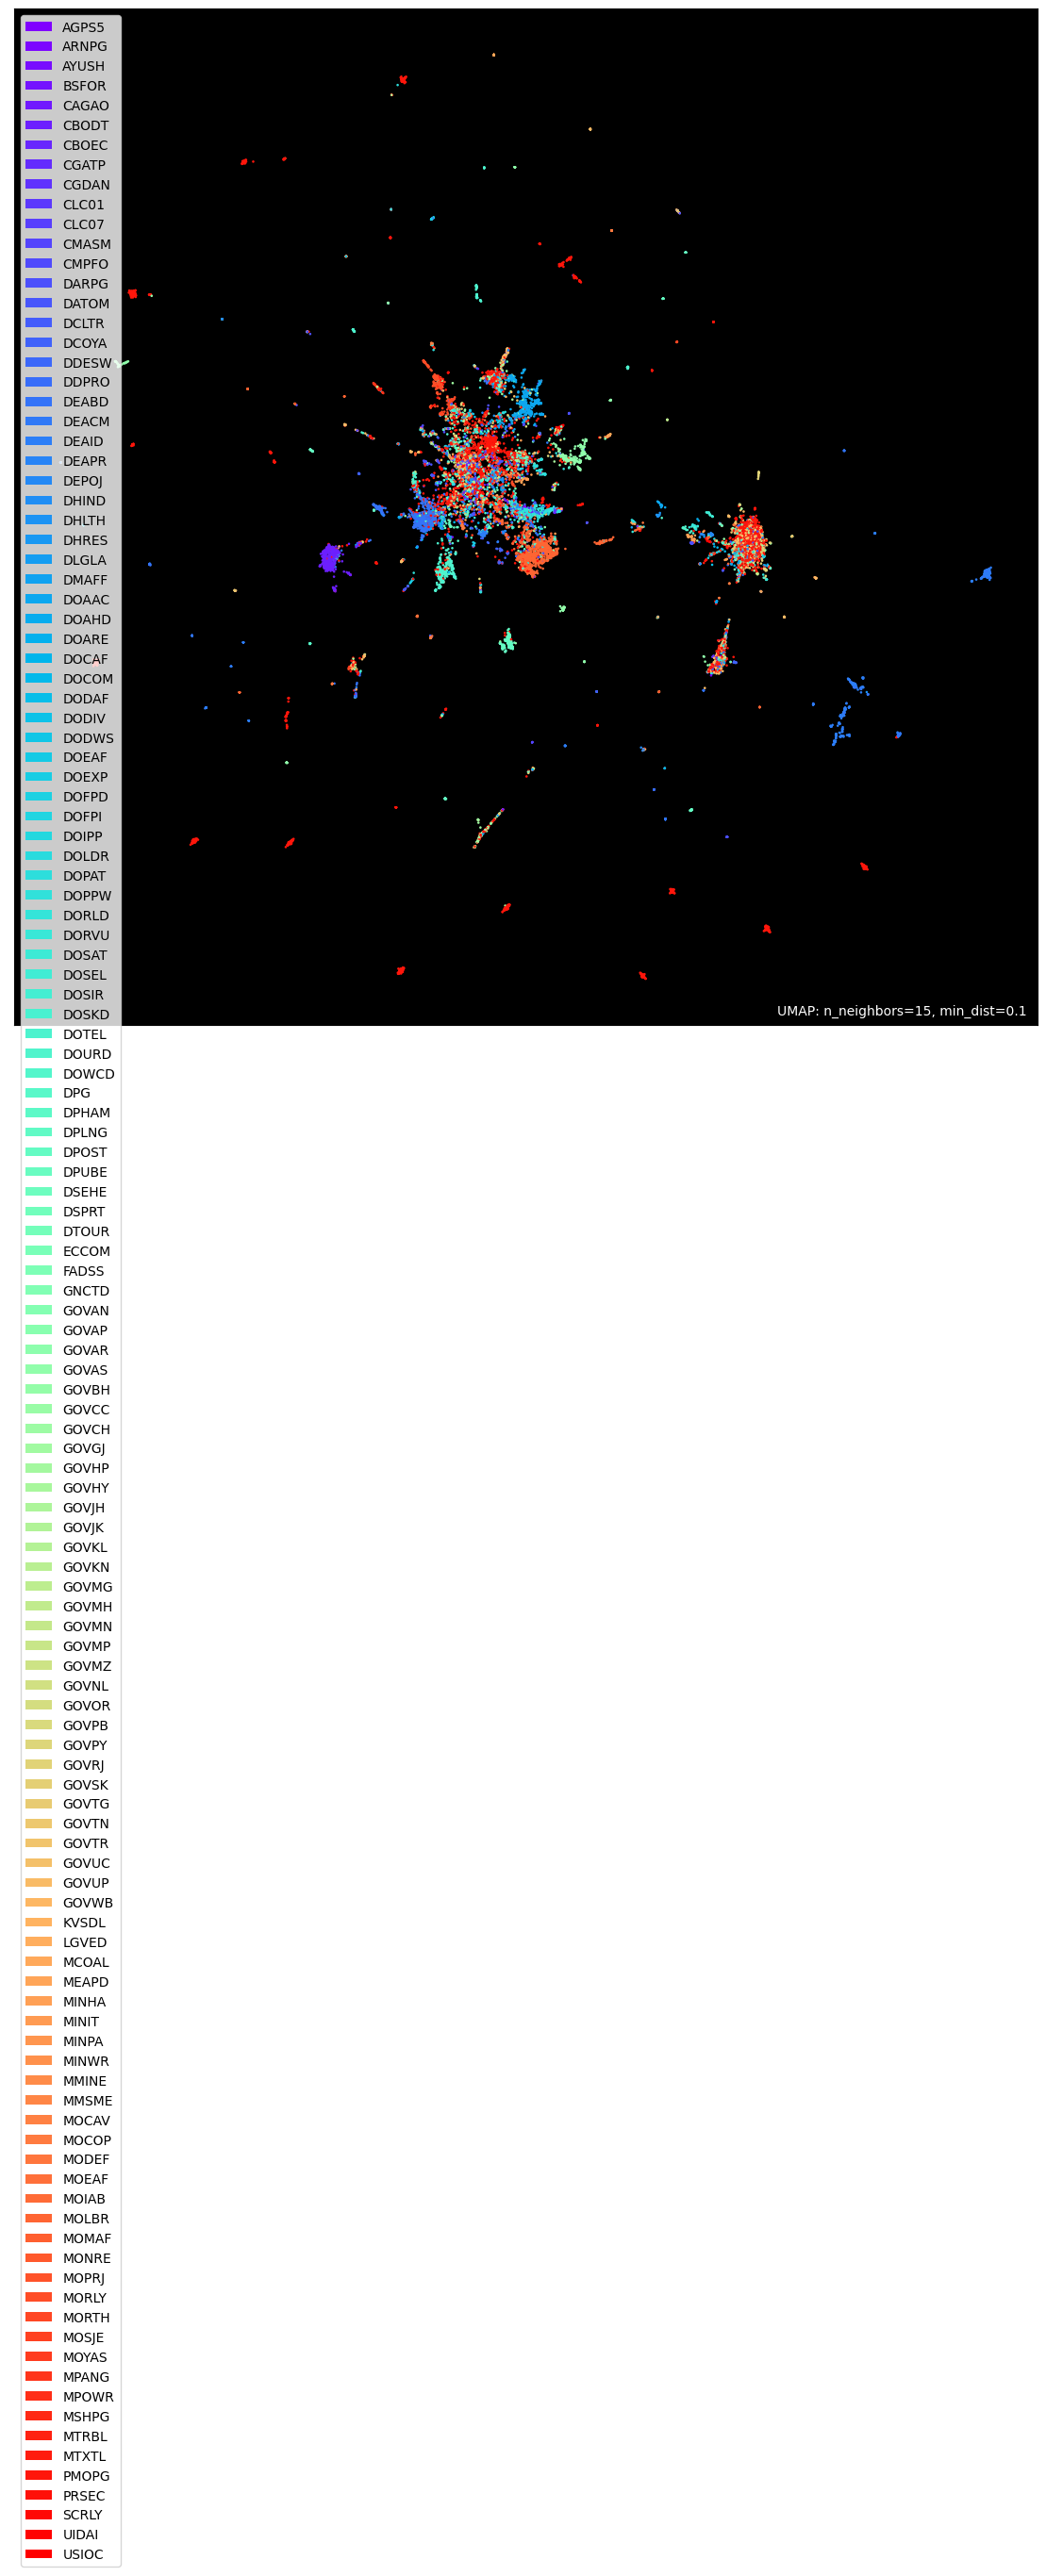

In [16]:
umap_obj = umap.UMAP().fit(embeddings_1)
f = u_plot.points(umap_obj, labels=res_1.org, height=1400, width=1400, theme="fire")
plt.savefig("Image/Res_18k_org.png")

In [ ]:
umap_obj = umap.UMAP(n_neighbors=6900).fit(embeddings_1)
f = u_plot.points(umap_obj, labels=res_1.aggClustering_6900, height=960, width=960, theme="fire")
plt.savefig("Image/1.png")

In [ ]:
umap_obj = umap.UMAP(n_neighbors=8100).fit(embeddings_1)
f = u_plot.points(umap_obj, labels=res_1.aggClustering_8100, height=960, width=960, theme="fire")
plt.savefig("Image/Res_18k_AggClustering_8100.png")

# Rough

In [48]:
cate = df.org

In [62]:
max_idx = 24000

embedding_max_idx = embeddings[:max_idx]
cate_max_idx = cate[:max_idx]

In [ ]:
umap_obj = umap.UMAP(n_neighbors=270, min_dist=0.1, random_state=0, metric='cosine').fit(embedding_max_idx)
f = u_plot.points(umap_obj, labels=cate_max_idx, theme="fire")
u_plot.plt.show()

/home/kushalbellani18/.local/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
umap_obj = umap.UMAP(n_neighbors=270, min_dist=0.1, random_state=0, metric='cosine').fit(embedding_max_idx)
f = u_plot.points(umap_obj, labels=cate_max_idx, theme="fire")
u_plot.plt.show()